# 포지션 추천 알고리즘 구현하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-데이터-살펴보기" data-toc-modified-id="2.-데이터-살펴보기-2">2. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#2.1-어떤-포지션이-많을까?" data-toc-modified-id="2.1-어떤-포지션이-많을까?-2.1">2.1 어떤 포지션이 많을까?</a></span></li><li><span><a href="#2.2-어느-회사에서-많이-뽑나?" data-toc-modified-id="2.2-어느-회사에서-많이-뽑나?-2.2">2.2 어느 회사에서 많이 뽑나?</a></span></li><li><span><a href="#2.3-어떤-산업-카테고리가-많을까?" data-toc-modified-id="2.3-어떤-산업-카테고리가-많을까?-2.3">2.3 어떤 산업 카테고리가 많을까?</a></span></li><li><span><a href="#2.4-회사-소개-살펴보기" data-toc-modified-id="2.4-회사-소개-살펴보기-2.4">2.4 회사 소개 살펴보기</a></span></li><li><span><a href="#2.5-직무-내용-관련-항목들" data-toc-modified-id="2.5-직무-내용-관련-항목들-2.5">2.5 직무 내용 관련 항목들</a></span></li></ul></li></ul></div>

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
import tqdm

In [2]:
plt.rc('font', family = 'NanumGothic')
plt.rc('font', size = 13)

In [3]:
df = pd.read_csv('source/cute_penguins_1/wanted_raw.csv')
df.head(2)

,name,position,wanted_cat,about,roll,qual,pref,category,tags,link
0,룩인바디,[인바디 앱] Data Scientist,머신러닝 엔지니어,"인바디에서 2018년 분사 후, \n200만+ 사용자, 2,500만+ 인바디데이터의...",- 데이터 파이프라인 중 개선이 필요한 사항이 무엇인지 검토하고 개선안을 도출하여 ...,- 데이터 관련 업무를 1년 이상 수행하신 분\n- 주도적인 문제 해결의 경험이 있...,"- 룩인바디와 함께 성장하길 희망하며, 다양한 역할 수행에 대해 열려있는 분\n- ...","IT, 컨텐츠","['연봉업계평균이상', '인원급성장', '50명이하', '설립3년이하', '성과급'...",https://www.wanted.co.kr/wd/34549
1,투블럭에이아이,AI 자연어처리 관련 서비스 개발,머신러닝 엔지니어,최신 Deep NLP 기술의 현실 업무 적용의 경험을 통해서 인공지능과 업무자동화의...,"NLP 관련 기술개발 \nNER , MRC 등 Task 모듈 개발 \n데이터 정제 ...",• NP 관련 기술 Stack 보유자 (단순히 자연어처리에 관심이 있으신 분은 거절...,"• 전산학 석사 이상, 자연어처리 전공자 우대, 검색 포탈 경력자 우대\n• 유관 ...","IT, 컨텐츠","['인원급성장', '50명이하', '설립3년이하', '인공지능', 'IT, 컨텐츠']",https://www.wanted.co.kr/wd/44279


In [4]:
df.shape

(539, 10)

* 539개의 포지션이 모아졌다.
* 스몰스몰한 데이터지만 한 번 분석해보자!

In [5]:
df.isnull().sum().sum()

0

## 2. 데이터 살펴보기

### 2.1 어떤 포지션이 많을까?
* 원티드에서 제공하는 카테고리로 간단하게 살펴보자.

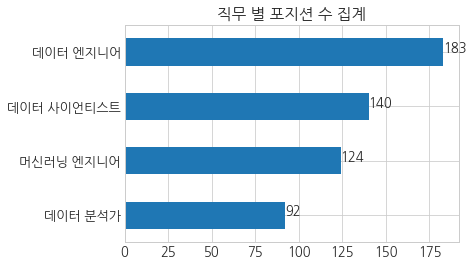

In [6]:
# 직무 집계
countposition = df.wanted_cat.value_counts().sort_values()
countposition.plot('barh', title='직무 별 포지션 수 집계')
for i, v in enumerate(countposition):
    plt.text(v, i, v)
plt.show()

* 데이터 엔지니어가 가장 많다.
* 나는 데이터 분석가를 준비하는데... 가장 적다ㅠ 쥬르륵
* 물론 회사마다 분석가-데.싸의 직무가 겹치는 경우가 있어서 결과를 봐야 알 듯!

### 2.2 어느 회사에서 많이 뽑나?
* 분석가를 많이 뽑는 회사들의 특징이 있을 것 같다.

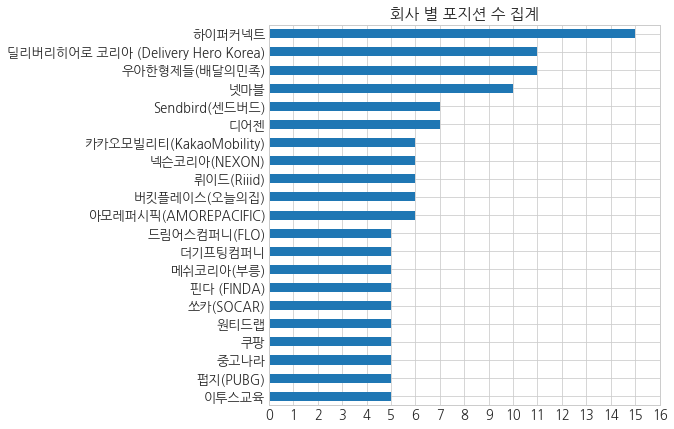

In [7]:
# 데이터 관련 포지션 5개 이상 있는 곳만 추리기
countcompany = df.name.value_counts()[df.name.value_counts()>=5].sort_values()
plt.figure(figsize=(7,7))
countcompany.plot('barh', title='회사 별 포지션 수 집계')
plt.xticks([val for val in range(17)])
plt.show()

* 하이퍼커넥트가 15군데로 가장 많다.
* 그 다음으로는 딜리버리히어로, 우아한형제들이 잇는다. 
    * 안 그래도 성장하고 있던 산업이, 코로나로 인해 더 커지면서 데이터가 기존보다 많이 쌓이고있을 것 같다.
    * 이것을 활용하기 위한 인력이 부족해서 뽑는것은 아닐까 혹시 그 자리가 내 자리일까 상상해본다.
* 인테리어 산업에서 성장하고있는 오늘의집도 보이고,
* 모빌리티 강자 쏘카와 카카오모빌리티도 보인다.
    * 모빌리티는 데이터가 쏟아진다고 알고있다.

### 2.3 어떤 산업 카테고리가 많을까?
* 원티드에 등록되어있는 카테고리라 범위가 넓긴 하겠지만 일단 살펴보자.

In [20]:
df.shape

(539, 10)

In [21]:
df.name.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
534    False
535     True
536    False
537     True
538     True
Name: name, Length: 539, dtype: bool

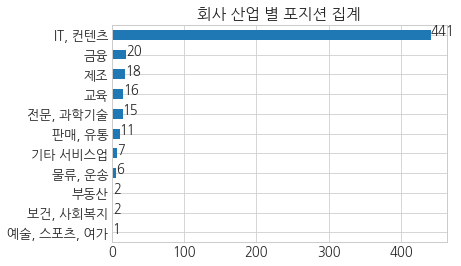

In [8]:
countcategory = df.category.value_counts().sort_values()
countcategory.plot('barh', title='회사 산업 별 포지션 집계')
for i, v in enumerate(countcategory):
    plt.text(v, i, v)
plt.show()

* 혹시나 했지만 역시나 IT분야가 가장 많다.
* 특이한 산업이 보이는데, 어떤 회사인지 찾아보자.
    1. 부동산
        * 직방, 다방일 것 같긴 한데 맞나?
    2. 보건, 사회복지
        * 어떤 회사일지 전혀 감이 안 온다.
    3. 예술, 스포츠, 여가
        * 역시 감이 안 온다.

In [9]:
df.query('category in ("보건, 사회복지", "부동산", "예술, 스포츠, 여가")')[['name', 'category']]\
.sort_values(by='category')

,name,category
83,올리브유니온(OliveUnion),"보건, 사회복지"
452,눔코리아(noom),"보건, 사회복지"
483,피터팬의 좋은방 구하기(PETERPANZ),부동산
484,피터팬의 좋은방 구하기(PETERPANZ),부동산
450,열정에기름붓기,"예술, 스포츠, 여가"


1. 부동산
    * 예상이 틀렸다. 피터팬의 좋은방 구하기였다! 오오
2. 보건, 사회복지
    * 올리브유니온은 보청기 산업에서 유통의 문제점을 해결하려 하는 스타트업이다.
        * 시니어 비즈니스(?)에는 큰 관심이 없어서 처음 봤는데, 미션이 좋다고 느꼈다.
    * 눔코리아는 모바일 헬스케어 서비스를 운영하는 회사다.
    * 어떤 데이터를 분석할지 궁금하다.
3. 예술, 스포츠, 여가
    * 열정에 기름붓기는 동기부여, 라이프스타일 관련 콘텐츠를 발행하는 곳으로 알고있었다.(페북에서 자주 보여서) 
    * 원티드에서 카테고리를 일단 예술, 스포츠, 여가 쪽으로 잡았는데, IT 및 콘텐츠로 잡는게 더 바람직하지 않았을까 싶다.
    

### 2.4 회사 소개 살펴보기

In [25]:
for content in df['about'][0:2]:
    print(content)
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

인바디에서 2018년 분사 후, 
200만+ 사용자, 2,500만+ 인바디데이터의 인바디 앱을 기반으로 
건강 관리 플랫폼 및 서비스를 만들고 있는 룩인바디에서 Data Scientist를 모십니다.

신규 서비스로써 2019년 4월 온라인 다이어트 서비스(월 4만원) 런바디챌린지를 시작하였으며, 
매월 700명 이상의 사용자가 결제하고 50% 이상이 재구매하는 효과를 보이고 있습니다. 

런바디챌린지에서 이미 80만건이 넘는 식단 운동 사진 및 각종 사용성 데이터가 쌓여 있으며 
빠른 속도로 데이터가 늘어나고 있습니다. 

서비스를 더욱 윤택하게 하기 위해,
쌓이는 데이터를 분석하고 머신러닝 모델 적용을 시도하고 있습니다.

저희와 함께 데이터 기반 서비스 구축을 주도해나가실 분을 모십니다.

Data Scientist, WHY 룩인바디?
- 1인 1분야, Data Scientist로써 데이터 수집부터 분석, 실서비스의 적용에까지 A to Z의 업무를 경험할 수 있습니다.
- 인바디데이터 2,500만+, 인바디 앱 유저 200만+, WAU 23만+, 생활습관데이터 90만+ 등 동규모 스타트업에서 경험할 수 없는 방대하고 유의미한 데이터를 다룰 수 있습니다.
- 수평적인 기업 문화로 아직 다듬어지지 않은 서비스를 주도적으로 발전시켜나갈 수 있습니다.
- Data Engineer, Server Engineer 등 10년 이상 경력의 전문가들과 협업할 수 있습니다.
- 탄력근무제, 재택근무, 무제한 연차, Sprint 후 강제 연차 등 팀원의 신체적 정신적 컨디션을 최상으로 만들기 위해 팀원 모두가 다방면으로 노력합니다.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
최신 Deep NLP 기술의 현실 업무 적용의 경험을 통해서 인공지능과 업무자동화의 연결을 직접 경험해보는 기회에 도전해 보세요.
- - - - - - - - - - - - - - - - - - - - - - - - - - - -

* 소개를 길게 한 회사가 있는 반면, 한 줄로 상당히 짧게 한 회사도 있다.
* 아마 짧게 회사 소개가 짧을 경우, 추후 알고리즘에서 평가가 낮을 것으로 예상된다.
    * 지원자 입장에서도 회사 소개가 짧으면 어떤 일을 하는 회사인지 파악하기가 힘들다는 점에서 합리적인 것으로 보인다.
    * (소개좀 자세하게 해주세요 ㅠㅠ 우리도 자소서 쓰잖아효)

### 2.5 직무 내용 관련 항목들
* roll, qualification, preference

In [35]:
print('주요 업무 중 일부\n')
for content, name in zip(df['roll'][-3: -1], df['name'][-3:-1]):
    print('{}\n{}'.format(name, content))
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

주요 업무 중 일부

윙블링
• 데이터분석 및 시각화 (자사몰, Paid Marketing 채널, SCM 등)
• 자사몰 UX/UI 등 데이터분석 기반 우선순위 설정 및 프로젝트 PM
• 전사 데이터 기반 문화 확산
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
여기어때컴퍼니
- 전사 전략 수립 및 핵심 지표 관리
- 전사 및 사업부 단위 프로젝트(Value Creation Project) 기획/관리
- 신사업 개발 및 인수/제휴 추진 (사업타당성 검토, valuation 등)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [37]:
print('자격 요건 중 일부\n')
for content, name in zip(df['qual'][200: 202], df['name'][200: 202]):
    print('{}\n{}'.format(name, content))
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

자격 요건 중 일부

기아자동차
· 관련 경력 5년 이상

    - 국내외 데이터 거버넌스 수립, 데이터 아키텍트 업무

※ 해외여행 또는 비자 발급 요건에 결격 사유 없는 분, 남자는 병역 필 또는 면제되신 분에 한해 지원 가능합니다.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
줌인터넷(zum)
- 신입 / 경력 5년 이하 

- Python, Java, Scala, Shell 등에 대해 능숙하게 다룰 수 있는 언어가 2개 이상 

- 데이터베이스 지식 및 SQL 가능한 분 

- API서버, 웹서버 개발과 유지보수 경험이 있는 분 

- Hadoop Ecosystem 관련 지식 및 경험이 있는 분
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [39]:
print('우대 사항 중 일부\n')
for content, name in zip(df['pref'][75: 77], df['name'][75: 77]):
    print('{}\n{}'.format(name, content))
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

우대 사항 중 일부

Sendbird(센드버드)
•
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
우아한형제들(배달의민족)
- 해당 분야 석사/박사 학위 혹은 5년 이상의 개발 경력을 갖춘 분
- 관련 기술 개발 실무 및 리딩 경험이 있는 분
- ROS(ROS2) 기반의 이동로봇 개발 경험이 있는 분
- 컴퓨터 비전, 머신러닝 경험이 있는 분
- C/C++, Python 활용이 가능한 분
- 영어문서작성 및 회화 능력을 갖춘 분
- 다양한 직군과의 원활한 협업 및 의사소통 능력을 갖춘 분 
- 끝까지 마무리할 수 있는 책임감을 바탕으로 함께 성장하고자 하는 분

[꼭 읽어 주세요!]
- 지원 시 경력기술서(PDF형식) 필수 첨부 부탁드립니다.
- 경력기술서는 자신의 기술력을 보여 줄 수 있는 프로젝트나 협력 했던 활동사항 위주로 작성해주세요.
  (진행기간, 주요업무내용, 본인이 기여한 기술력, 결과/성과/성취 등)
- 코딩테스트는 개별적으로 안내드리며, 테스트 제출 후 평균 일주일 이내 결과가 발표됩니다.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


* 회사마다 형식이 다르다는 점을 참고하자.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
v = CountVectorizer()
D = ['안녕하세요 저는', '박승현', '입니다', '뭐하세요?', '안녕하세요', '아니...', '걔 진짜 뭔데', '아버지가방에들어가신다']
x = v.fit(D)
v.vocabulary_

{'안녕하세요': 5,
 '저는': 7,
 '박승현': 2,
 '입니다': 6,
 '뭐하세요': 0,
 '아니': 3,
 '진짜': 8,
 '뭔데': 1,
 '아버지가방에들어가신다': 4}

In [67]:
v.transform(['그래서', 'dfa', '안녕하세요']).toarray()


array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [69]:
from konlpy.tag import Okt
okt = Okt()

In [77]:
df.about

0      인바디에서 2018년 분사 후, \n200만+ 사용자, 2,500만+ 인바디데이터의...
1      최신 Deep NLP 기술의 현실 업무 적용의 경험을 통해서 인공지능과 업무자동화의...
2      뉴로핏은 뛰어난 뇌공학, 의료인공지능 기술을 실제 의료현장에 적용하여 의료진의 불편...
3      오드컨셉은 2012년 5월 설립된 시각지능(Visual Cognition) 스타트업...
4      테서(Tesser Inc) 는 데이터 기반 의료인 네트워크 서비스를 목표로 자체 플...
                             ...                        
534                                                   - 
535    좋은 숙소에서 행복한 시간을!\n\n위드이노베이션은 숙박 여정의 불편함을 해결하고 ...
536    윙블링 소개 \n\n윙블링은 '아름다움에 날개를달다'라는 미션과 함께 빠르게 성장...
537    좋은 숙소에서 행복한 시간을!\n\n위드이노베이션은 숙박 여정의 불편함을 해결하고 ...
538    루나소프트는 카카오와 네이버 플랫폼을 활용한 챗봇 구축과 독자 기술을 활용한 CTI...
Name: about, Length: 539, dtype: object

In [106]:
from tqdm.notebook import tqdm

words = []
for sentences in tqdm(df.about):
    for word, tag in okt.pos(sentences):
        if tag not in ['Punctuation', 'Josa', 'Foreign']:
            words.append(word)

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity  # 코사인 유사도
vect = CountVectorizer()
vect.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [121]:
vect = CountVectorizer(min_df=0, ngram_range=(1,2))
c = vect.fit_transform(df['about']) 
c_simi = cosine_similarity(c, c) 
c_simi_ind = c_simi.argsort()[:, ::-1]

In [167]:
df.iloc[435,:]

name                                                        넷마블
position                                    Machine Learning 개발
wanted_cat                                           데이터 사이언티스트
about         넷마블컴퍼니는 ‘Great Game Culture Company’의 비전 아래 재미...
roll          - Machine Learning 개발 (시계열 이상탐지 서비스 개발)\n  · 어...
qual          - 관련 분야 경력 6년 이상\n- Cloud 서비스 활용 경험\n- Python,...
pref          - 컴퓨터사이언스 또는 관련 전공\n- DSP(Digital signal proce...
category                                                IT, 컨텐츠
tags          ['연봉상위1', '1,000명이하', '설립10년미만', '퇴사율5', '누적투자...
link                          https://www.wanted.co.kr/wd/36492
Name: 435, dtype: object

In [172]:
df[df.name=='리디(RIDI)']

,name,position,wanted_cat,about,roll,qual,pref,category,tags,link
196,리디(RIDI),검색 엔지니어,데이터 엔지니어,[RIDI 기업소개]\n“Rich Imagination & Deep Insight”...,• 검색 API 개발 및 운영\n• 색인 시스템 개발 및 운영\n• 검색 모델 연구...,• 컴퓨터공학 분야 학사 이상 또는 개발 경력 3년 이상\n• 정보검색/기계학습 분...,"• 대용량 트래픽의 검색 시스템 운영 경험\n• 언어처리, 패턴인식 관련 학위 또는...","IT, 컨텐츠","['연봉상위20', '인원급성장', '300명이하', '설립10년이상', '누적투자...",https://www.wanted.co.kr/wd/5216
197,리디(RIDI),데이터 엔지니어,데이터 엔지니어,[RIDI 기업소개]\n“Rich Imagination & Deep Insight”...,"• 데이터 레이크 및 데이터 파이프라인 시스템 설계, 개발 및 운영\n• 데이터 분...","• 데이터 가공 및 분산 처리 기술에 대한 이해\n• 알고리즘, 데이터구조, OS,...","• Hadoop MR, Hive, Spark 등 분산 처리 기술 관련 개발 경험\n...","IT, 컨텐츠","['연봉상위20', '인원급성장', '300명이하', '설립10년이상', '누적투자...",https://www.wanted.co.kr/wd/1515
375,리디(RIDI),추천 엔지니어,데이터 사이언티스트,[RIDI 기업소개]\n“Rich Imagination & Deep Insight”...,• 추천 알고리즘 개발 및 품질 개선\n• 추천 서비스를 위한 웹 API 및 배치 ...,• 컴퓨터공학 분야 학사 이상 또는 개발 경력 3년 이상\n• 개인화 추천 또는 관...,• 기계학습 분야 석사 이상 또는 관련 경력 3년 이상\n• 실시간 및 대용량 데이...,"IT, 컨텐츠","['연봉상위20', '인원급성장', '300명이하', '설립10년이상', '누적투자...",https://www.wanted.co.kr/wd/2073


In [175]:
df.iloc[345,:]

name                                                오피지지(OP.GG)
position                                     데이터 분석가(게임 데이터 분석)
wanted_cat                                           데이터 사이언티스트
about         <회사소개>\nOP.GG는 서비스 개발에 열정이 넘치는 사람들로 가득한, 빠르게 성...
roll          OP.GG의 데이터 분석가는 게임 데이터 및 콘텐츠 분석, 이스포츠 데이터 분석, ...
qual          &lt;지원방법 및 채용프로세스&gt;\n지원방법\n• 이력서(필수)\n• 자기소개...
pref          • 1년 이상의 게임 데이터 분석 경험\n• 게임회사의 Data API를 직접 받아...
category                                                IT, 컨텐츠
tags          ['연봉상위20', '인원급성장', '50명이하', '설립10년미만', '퇴사율5'...
link                          https://www.wanted.co.kr/wd/43425
Name: 345, dtype: object

In [176]:
df[345:346]

,name,position,wanted_cat,about,roll,qual,pref,category,tags,link
345,오피지지(OP.GG),데이터 분석가(게임 데이터 분석),데이터 사이언티스트,"<회사소개>\nOP.GG는 서비스 개발에 열정이 넘치는 사람들로 가득한, 빠르게 성...","OP.GG의 데이터 분석가는 게임 데이터 및 콘텐츠 분석, 이스포츠 데이터 분석, ...",&lt;지원방법 및 채용프로세스&gt;\n지원방법\n• 이력서(필수)\n• 자기소개...,• 1년 이상의 게임 데이터 분석 경험\n• 게임회사의 Data API를 직접 받아...,"IT, 컨텐츠","['연봉상위20', '인원급성장', '50명이하', '설립10년미만', '퇴사율5'...",https://www.wanted.co.kr/wd/43425


In [173]:
df_simi = pd.DataFrame(c_simi)
df_simi
df_simi.sort_values(by=196, ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,538
375,0.064779,0.017152,0.013631,0.036181,0.049515,0.039319,0.043710,0.057490,0.043193,0.016816,...,0.047606,0.019051,0.008675,0.000000,0.0,0.0,0.007671,0.041494,0.007671,0.027328
197,0.064779,0.017152,0.013631,0.036181,0.049515,0.039319,0.043710,0.057490,0.043193,0.016816,...,0.047606,0.019051,0.008675,0.000000,0.0,0.0,0.007671,0.041494,0.007671,0.027328
196,0.064779,0.017152,0.013631,0.036181,0.049515,0.039319,0.043710,0.057490,0.043193,0.016816,...,0.047606,0.019051,0.008675,0.000000,0.0,0.0,0.007671,0.041494,0.007671,0.027328
339,0.106432,0.000000,0.042816,0.049246,0.074652,0.074101,0.050995,0.072231,0.093030,0.035213,...,0.039875,0.059839,0.010900,0.000000,0.0,0.0,0.033732,0.065166,0.033732,0.040058
345,0.106026,0.000000,0.042653,0.049058,0.074368,0.073818,0.050800,0.071955,0.092675,0.035079,...,0.039723,0.059612,0.010858,0.000000,0.0,0.0,0.033603,0.064918,0.033603,0.039905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.281718,0.0,0.0,0.000000,0.000000,0.000000,0.000000
272,0.027277,0.000000,0.009327,0.066017,0.000000,0.021523,0.025635,0.000000,0.025332,0.053695,...,0.021716,0.013035,0.023744,0.000000,0.0,0.0,0.000000,0.047320,0.000000,0.000000
271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
94,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [112]:
words

['인바디',
 '2018년',
 '분사',
 '후',
 '200만',
 '사용자',
 '2,500만',
 '인바디',
 '데이터',
 '인바디',
 '앱',
 '기반',
 '건강',
 '관리',
 '플랫폼',
 '및',
 '서비스',
 '만들고',
 '있는',
 '룩',
 '인바디',
 'Data',
 'Scientist',
 '를',
 '모십니다',
 '신규',
 '서비스',
 '로써',
 '2019년',
 '4월',
 '온라인',
 '다이어트',
 '서비스',
 '월',
 '4만원',
 '런',
 '바디',
 '챌',
 '린지',
 '시작',
 '하였으며',
 '매월',
 '700',
 '명',
 '이상',
 '사용자',
 '결제',
 '50%',
 '이상',
 '재구',
 '매하',
 '효과',
 '보이',
 '있습니다',
 '런',
 '바디',
 '챌',
 '린지',
 '이미',
 '80만',
 '넘는',
 '식단',
 '운동',
 '사진',
 '및',
 '각종',
 '사용성',
 '데이터',
 '쌓여',
 '있으며',
 '빠른',
 '속도',
 '데이터',
 '늘어나고',
 '있습니다',
 '서비스',
 '더욱',
 '윤택',
 '하게',
 '하기',
 '위해',
 '쌓이는',
 '데이터',
 '분석',
 '머신',
 '러닝',
 '모델',
 '적용',
 '시도',
 '있습니다',
 '저희',
 '함께',
 '데이터',
 '기반',
 '서비스',
 '구축',
 '주도해',
 '나가실',
 '분',
 '모십니다',
 'Data',
 'Scientist',
 'WHY',
 '룩',
 '인바디',
 '1',
 '인',
 '1분',
 'Data',
 'Scientist',
 '로써',
 '데이터',
 '수집',
 '분석',
 '실',
 '서비스',
 '적용',
 'A',
 'to',
 'Z',
 '의',
 '업무',
 '경험',
 '할',
 '수',
 '있습니다',
 '인바디',
 '데이터',
 '2,500만',
 '인바디',
 '앱',
 '유저',
 '2